In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import astropy.units as u
import astropy.constants as constants

In [12]:
filter_path = '/home/aalvarez/Phosphoros/AuxiliaryData/Filters/DC2/'
filters = dict()
for f in os.listdir(filter_path):
    fname = os.path.splitext(f)[0]
    filters[fname] = np.genfromtxt(os.path.join(filter_path, f))

In [140]:
sed = np.genfromtxt('/home/aalvarez/Phosphoros/AuxiliaryData/SEDs/CosmosEll_el/Ell1_A_0.sed')
redshift=2.3
sed[:,0]*=redshift
sed[:,1]/=redshift**2

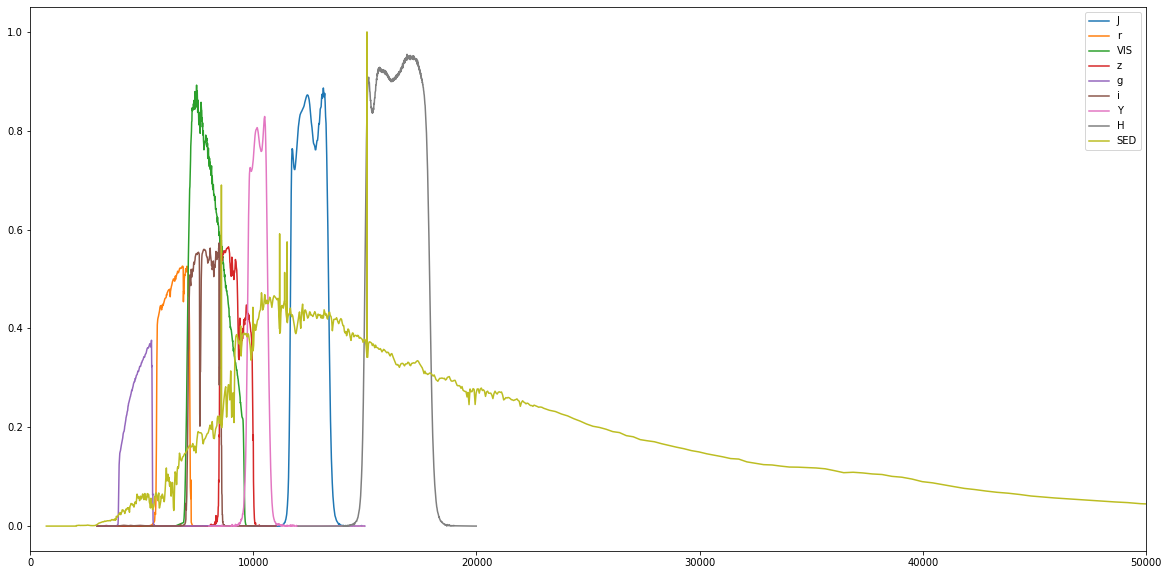

In [141]:
plt.figure(figsize=(20, 10))
for f in filters:
    plt.plot(filters[f][:,0], filters[f][:,1], label=f)
plt.plot(sed[:, 0], sed[:, 1]/np.max(sed[:,1]), label='SED')
plt.xlim(0, 50000)
plt.legend()
plt.show()

In [142]:
def compute_energy_norm(trans):
    v = trans.copy()
    v[:,1] = v[:,1] / v[:,0]**2
    return np.trapz(v[:,1], x=v[:,0]) * 2.998e+18

In [143]:
def compute_photon_norm(trans):
    v = trans.copy()
    v[:,1] = v[:,1] / v[:,0]
    return np.trapz(v[:,1], x=v[:,0]) * 2.998e+18

In [144]:
def compute(trans, sed):
    sed_interp = np.interp(trans[:, 0], sed[:,0], sed[:,1])
    sed_filtered = sed_interp * trans[:,1]
    return (np.trapz(sed_filtered, x=trans[:,0]) / compute_energy_norm(trans)) * 1e29

In [145]:
def compute_photon_eq(trans, sed):
    sed_interp = np.interp(trans[:, 0], sed[:,0], sed[:,1])
    sed_filtered = sed_interp * trans[:,1]
    return (np.trapz(sed_filtered*trans[:,0], x=trans[:,0]) / compute_photon_norm(trans)) * 1e29

In [146]:
def compute_photometry(sed, filters, eq=compute_photon_eq):
    dtype = [(f, np.float32) for f in filters.keys()]
    photo = np.zeros((1,), dtype=dtype)
    for f, t in filters.items():
        photo[f][0] = eq(t, sed)
    return photo

In [153]:
photon_photo = compute_photometry(sed, filters)
scale = photon_photo['i'] / 0.05
for f in filters.keys():
    photon_photo[f] /= scale

In [154]:
photon_old = compute_photometry(sed, filters, eq=compute)
scale = photon_old['i'] / 0.05
for f in filters.keys():
    photon_old[f] /= scale

In [155]:
print(photon_photo['H'])
print(photon_old['H'])

[0.40510252]
[0.4094995]
